In [174]:
import numpy as np
import matplotlib.pyplot as plt 
import kitcolors as kit 
from mpl_toolkits.mplot3d import Axes3D
from numpy import outer as kk
import os 

In [187]:
def plottri(proj,name):
    x = [1,0,0,1]
    y = [0,1,0,0]
    z = [0,0,1,0]

    plt.style.use("kitishblank")
    fig = plt.figure(figsize=(3,3),constrained_layout=True)
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, 20)


    npoints = 200 

    A = np.array([1,0,0])
    B = np.array([0,1,0])
    C = np.array([0,0,1])

    col = kit.black
    for t in np.linspace(0,1,4):

        psize = 1
        s = np.linspace(0,1,npoints)
        start,end = kk(t,A)+kk(1-t,B),kk(t,A)+kk(1-t,C)
        data = kk(s,start)+kk(1-s,end)
        data = proj(data)
        patches = ax.scatter(data[:,0],data[:,1],data[:,2],color = kit.black,s = psize,zorder=-1)

        s = np.linspace(0,1,npoints)
        start,end = kk(t,C)+kk(1-t,A),kk(t,C)+kk(1-t,B)
        data = kk(s,start)+kk(1-s,end)
        data = proj(data)
        patches = ax.scatter(data[:,0],data[:,1],data[:,2],color = kit.black,s = psize,zorder=-1)

        s = np.linspace(0,1,npoints)
        start,end = kk(t,B)+kk(1-t,C),kk(t,B)+kk(1-t,A)
        data = kk(s,start)+kk(1-s,end)
        data = proj(data)
        patches = ax.scatter(data[:,0],data[:,1],data[:,2],color = kit.black,s = psize,zorder=-1)


    for t in np.linspace(0,1,4):

        data =proj(t*A+(1-t)*B)
        patches = ax.scatter(data[0],data[1],data[2],s=100,c=[col],zorder=100)
        data =proj(t*A+(1-t)*C)
        patches = ax.scatter(data[0],data[1],data[2],s=100,c=[col],zorder=100)
        data =proj(t*C+(1-t)*B)
        patches = ax.scatter(data[0],data[1],data[2],s=100,c=[col],zorder=100)


    M = (A+B+C)/3
    ax.scatter(*(proj(M)),s=100,c=[col])


    a = 1/3
    b = 1-a
    p1 = b*A+a*B
    p2 = b*A+a*C
    p3 = a*A+b*C
    p4 = a*B+b*C
    p5 = b*B+a*C
    p6 = b*B+a*A

    for P1,P2 in zip([p1,p2,p3,p4,p5,p6],[p2,p3,p4,p5,p6,p1]):
        psize = 1
        mid0 = (P1+M)/2
        mid1 = (P1+P2+M)/3
        mid2 = (P2+M)/2
        s = np.linspace(0,1,npoints)
        data = kk(s,mid1)+kk(1-s,mid0)
        data = proj(data)
        patches = ax.scatter(data[:,0],data[:,1],data[:,2],color = kit.green,s = 2*psize,zorder=100)
        data = kk(s,mid1)+kk(1-s,mid2)
        data = proj(data)
        patches = ax.scatter(data[:,0],data[:,1],data[:,2],color = kit.green,s = 2*psize,zorder=100)




    #---------------------- Style ----------------------#
    plt.grid("off")
    ax.set_xticks([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel(r"$x$",labelpad=-10)
    ax.set_ylabel(r"$y$",labelpad=-10)
    ax.set_zlabel(r"$z$",labelpad=-10)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')
    l = 1.1
    ax.set_xlim([0,l])
    ax.set_ylim([0,l])
    ax.set_zlim([0,l])

    plt.savefig("{}.pdf".format(name),rasterized=True)
    os.system(f"pdfcrop --margins '1 1 1 1' {name}.pdf {name}.pdf")


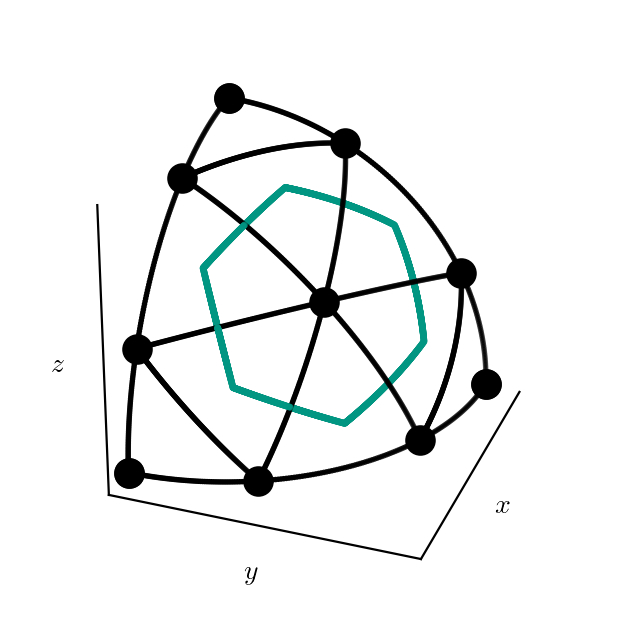

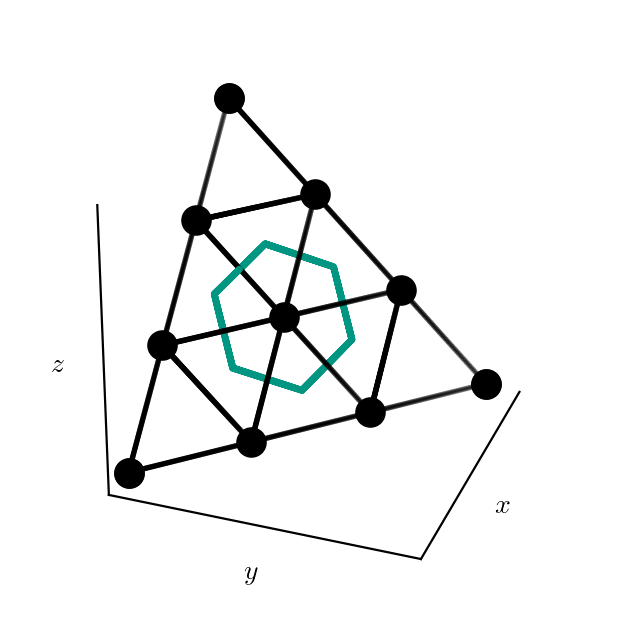

In [188]:
def proj(x):
    if x.shape[0] == 3:
        return x/np.linalg.norm(x)
    else:
        nx = np.linalg.norm(x,axis=1)
        return (x/nx[:,None])
    
def projdummy(x):
    return x

plottri(proj,"projected")
plottri(projdummy,"planar")
